Figure: Accuracy of Omniscient overall
Figure: Accuracy of Self-ref overall
Figure: Percent clique deciding split by first and second waves Omniscient
Figure: Same, self-ref
Optional Figure: Second wave accuracy? 
Optional Figure: Thresholds of agents in first and second waves
Figure: Social evidence histogram by threshold for omniscient

Note: Self ref data seems to be available up to n = 10000

In [1]:
import os
print(os.getcwd())
import numpy as np
import scipy.special as sp
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.integrate import quad


C:\Users\Megan\Documents\Python Scripts\NMW Uniform Omniscient


In [15]:


# Want: give it n, str1, a_values and have it return (datatype list?) the percent of clique that is accurate.
# if I let it also give me variable name, the caller has the ability to specify whether this is out of deciding 
# or out of FDA or FDW
pi = np.pi
def fractionAccurate(n,FD = 2,variableName = 'wavesAcc',str1 = 'OmniUniform_',a_values = (.1,.2,.3,.4,.5,.7,.8)):
    accs = []
    ciLow = []
    ciHigh = []
    for a in a_values:
        astr = str(a)
        fileName = str1 + astr.replace('.','_') + '_Cooked_n' + str(n) + '.mat'
        current = sio.loadmat(fileName)
        waves = current[variableName]
        deciders = []
        decLow = []
        decHigh = []
        for i in range(0,9):
            deciders.append(waves.item(i,FD,0))
            decLow.append(waves.item(i,FD,1))
            decHigh.append(waves.item(i,FD,2))
            
        avg = (sum(deciders))/n
        avglow = (sum(decLow))/n
        avghigh = (sum(decHigh))/n
        accs.append(avg)
        ciLow.append(avglow)
        ciHigh.append(avghigh)
    return accs, ciLow, ciHigh

def fracVsA(n, FD = 2, index = 1, variableName = 'wavesDec', str1 = 'OmniUniform_', a_values = (.1,.2,.3,.4,.5,.7,.8)):
    accs = []
    cilow = []
    cihigh = []
    for a in a_values:
        astr = str(a)
        fileName = str1 + astr.replace('.','_') + '_Cooked_n' + str(n) + '.mat'
        current = sio.loadmat(fileName)
        waves = current[variableName]
        new = waves.item(index,FD,0)/n
        accs.append(new)
        cilow.append(waves.item(index,FD,1)/n)
        cihigh.append(waves.item(index,FD,2)/n)
    return accs, cilow, cihigh

def MoI(x,time,z,D = 1, mu = 1):
    #z = 1.0
    nom = 4*D*time
    mut = mu*time
    zed = mu*z/D
    j = (1/np.sqrt(pi*nom))*np.exp(-(x-mut)**2/nom) - np.exp(-(x-2*z-mut)**2/nom+zed) - np.exp(-(x+2*z-mut)**2/nom-zed)
    return j

def RpMoI(time,low,high,z = 1.0,D = 1, mu = 1):
    #z = 1.0
    rplus = quad(MoI,low,high,args = (time,z))
    rminus = quad(MoI,-high,-low,args = (time,z))
    rp = np.log(rplus[0]/rminus[0])
    return rp
#aaa = fracVsA(10000,FD = 2, index = 0)
#print(aaa)

rainbow = sns.color_palette("Set1",9)

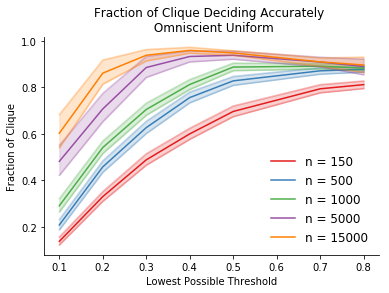

In [20]:
# Accuracy of omniscient case, overall
# variableName = wavesAcc. You'll want to sum the third column.

# Want to plot vs A, by n. 
# Regarding the 'by n'- you don't seem to have any currently that do this.
# Maybe it would be good to just pick a few n that you want to use instead of doing it automatically?
# We will use: n = [150,1000,5000,10000] and add 15,000 if it seems prudent

# Some other day, you'll figure out how to do this in a more elegant fashion, because this is just embarrassing. 

a_values = (.1,.2,.3,.4,.5,.7,.8)
# If you want to use a = 0.05, you need to fill in some missing data. You need batches 1-9 for a lot of n values.
# I also apparently only have data up through .8. You could fill in 1 with some other stuff, though, since it doesn't
# matter which gets called (homogeneous threshold)

str1 = 'OmniUniform_'
variableName = 'wavesAcc'
FD = 2
#n_values = (150,1000,5000,10000,15000)
n_values = (150,500,1000,5000,15000)

for i in range(5):
    n = n_values[i]
    aaa,cilow,cihigh = fractionAccurate(n,FD,variableName,str1,a_values)
    plt.plot(a_values,aaa, color = rainbow[i],label = 'n = ' + str(n))
    plt.plot(a_values,cilow, color = rainbow[i],alpha = .3)
    plt.plot(a_values,cihigh,color = rainbow[i],alpha=.3)
    plt.fill_between(a_values,cilow,cihigh,color = rainbow[i], alpha = .2)

plt.legend(fontsize = 12, frameon = False)
plt.xlabel('Lowest Possible Threshold')
plt.ylabel('Fraction of Clique')
plt.title('Fraction of Clique Deciding Accurately \n Omniscient Uniform')
sns.despine()

In [ ]:
# Accuracy of self-ref case, overall

# for a = .5, .7, we only have up through n = 5000.
# for a = .4, .8, no data exists at all
a_values = (.1,.2,.3,.4,.5,.7,.8)


str1 = 'SelfUniform_'
variableName = 'wavesAcc'
FD = 2
n_values = (150,1000,5000,10000,15000)

for i in range(5):
    n = n_values[i]
    aaa,cilow,cihigh = fractionAccurate(n,FD,variableName,str1,a_values)
    plt.plot(a_values,aaa, color = rainbow[i],label = 'n = ' + str(n))
    plt.plot(a_values,cilow, color = rainbow[i],alpha = .3)
    plt.plot(a_values,cihigh,color = rainbow[i],alpha=.3)
    plt.fill_between(a_values,cilow,cihigh,color = rainbow[i], alpha = .2)

plt.legend(fontsize = 12, frameon = False)
plt.xlabel('Lowest Possible Threshold')
plt.ylabel('Fraction of Clique')
plt.title('Fraction of Clique Deciding Accurately')

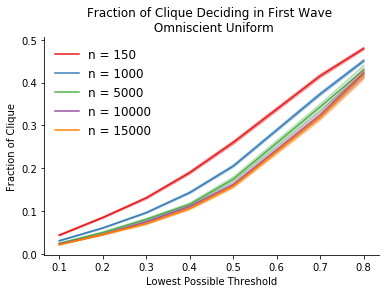

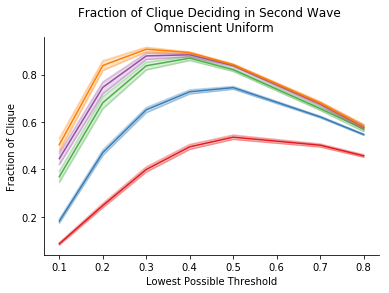

In [21]:
# Percent of clique deciding in first and second waves, omniscient

a_values = (.1,.2,.3,.4,.5,.7,.8)
str1 = 'OmniUniform_'
variableName = 'wavesDec'
FD = 2
index = 0
n_values = (150,1000,5000,10000,15000)

plt.figure()
for i in range(5):
    n = n_values[i]
    aaa,cilow,cihigh = fracVsA(n,FD,index,variableName,str1,a_values)
    plt.plot(a_values,aaa, color = rainbow[i],label = 'n = ' + str(n))
    plt.plot(a_values,cilow, color = rainbow[i],alpha = .3)
    plt.plot(a_values,cihigh,color = rainbow[i],alpha=.3)
    plt.fill_between(a_values,cilow,cihigh,color = rainbow[i], alpha = .2)

plt.legend(fontsize = 12, frameon = False)
plt.xlabel('Lowest Possible Threshold')
plt.ylabel('Fraction of Clique')
plt.title('Fraction of Clique Deciding in First Wave \n Omniscient Uniform')
sns.despine()
plt.figure()
index = 1
for i in range(5):
    n = n_values[i]
    aaa,cilow,cihigh = fracVsA(n,FD,index,variableName,str1,a_values)
    plt.plot(a_values,aaa, color = rainbow[i],label = 'n = ' + str(n))
    plt.plot(a_values,cilow, color = rainbow[i],alpha = .3)
    plt.plot(a_values,cihigh,color = rainbow[i],alpha=.3)
    plt.fill_between(a_values,cilow,cihigh,color = rainbow[i], alpha = .2)

#plt.legend(fontsize = 12, frameon = False)
plt.xlabel('Lowest Possible Threshold')
plt.ylabel('Fraction of Clique')
plt.title('Fraction of Clique Deciding in Second Wave \n Omniscient Uniform')
sns.despine()

In [ ]:
# Percent of clique deciding in first and second waves, self-ref

a_values = (.1,.2,.3,.4,.5,.7,.8)
str1 = 'SelfUniform_'
variableName = 'wavesDec'
FD = 2
index = 0
n_values = (150,1000,5000,10000,15000)

plt.figure()
for n in n_values:
    aaa = fracVsA(n,FD,index,variableName,str1,a_values)
    plt.plot(a_values,aaa, label = 'n = ' + str(n))

plt.legend(fontsize = 12, frameon = False)
plt.xlabel('Lowest Possible Threshold')
plt.ylabel('Fraction of Clique')
plt.title('Fraction of Clique Deciding in First Wave %n Omniscient Uniform')

plt.figure()
index = 1
for n in n_values:
    aaa = fracVsA(n,FD,index,variableName,str1,a_values)
    plt.plot(a_values,aaa, label = 'n = ' + str(n))

plt.legend(fontsize = 12, frameon = False)
plt.xlabel('Lowest Possible Threshold')
plt.ylabel('Fraction of Clique')
plt.title('Fraction of Clique Deciding in Second Wave %n Omniscient Uniform')

Text(0.5, 1.0, 'Social information provided by agents after first wave \nFirst Decision Accurate\n Cumulative evidence = 2.70603024907701\n First Decider Threshold: 0.3238011542617899')

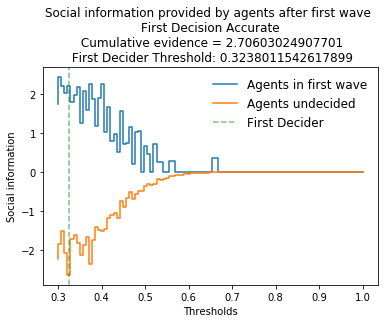

In [22]:
# social evidence histogram by thresholds for omniscient
# Want one graph that tracks all the positive social evidence layered over a graph that tracks the negative social evidence
# Not going to be covered with the histogram function =(
# So, need to do it manually. 
# 
# Regarding files. You weren't grabbing a cooked file here, you were grabbing a single realization. You need to transfer
# a batch file for whatever values you think you might want to do that at, then calculate the social information. 
# 
# Sort it according to 
trial = 5
numBins = 100
a = .3
astr = str(a)
n = 5000

fileName = 'OmniUniform_' + astr.replace('.','_') + '_Raw_n' + str(n) + '_batch_1.mat'

current = sio.loadmat(fileName)
agents = current['agents']
FDI = current['FDI']
times = current['times']

bins = np.linspace(a,1,numBins)
binsF1 = np.zeros_like(bins)
binsU1 = np.zeros_like(bins)

time = times.item(trial,0)
FDindex = FDI.item(trial,0)
FDthresh = agents.item(trial,0,abs(FDindex)-1)
if FDindex > 0:
    FDstr = 'First Decision Accurate'
else:
    FDstr = 'First Decision Wrong'
        

for i in range(0,n):
    zi = agents.item(trial,0,i)
    yi = agents.item(trial,1,i)
    binIndex = int(np.floor(numBins*(zi-a)/(1-a)))
    if i != abs(FDindex):
        if FDindex > 0:
            if yi + FDthresh > zi:
                binsF1[binIndex] = binsF1[binIndex] + RpMoI(time,low = zi-FDthresh,high = zi,z = zi,D = 1, mu = 1)
            else:
                binsU1[binIndex] = binsU1[binIndex] + RpMoI(time,low = -zi,high = zi-FDthresh,z = zi,D = 1, mu = 1)
        else:
            if yi - FDthresh < - zi:
                binsF1[binIndex] = binsF1[binIndex] + RpMoI(time,low = -zi,high = -zi + FDthresh,z = zi,D = 1, mu = 1)
            else:
                binsU1[binIndex] = binsU1[binIndex] + RpMoI(time,low =- zi + FDthresh,high = zi,z = zi,D = 1, mu = 1)
    
cumulative = sum(binsF1) + sum(binsU1) 
plt.plot(np.linspace(a,1,numBins),binsF1, linestyle = 'steps', label = 'Agents in first wave')
plt.plot(np.linspace(a,1,numBins), binsU1, linestyle = 'steps', label = 'Agents undecided')
plt.axvline(x=FDthresh,color = 'green', linestyle = '--', alpha = .5, label = 'First Decider' )

plt.legend(fontsize = 12, frameon = False)
plt.xlabel('Thresholds')
plt.ylabel('Social information')
plt.title('Social information provided by agents after first wave \n' + FDstr+ '\n Cumulative evidence = ' + str(cumulative) + '\n First Decider Threshold: ' + str(FDthresh))
#print(binsF1)
#print(binsU1)
